This is the work of Gabriel Baptista Trellesse for the dataset on: <https://www.kaggle.com/datasets/anasmohammedtahir/covidqu>

In [ ]:
# Downloading the dataset
if(input("Quer baixar?") == "yes"):
  #https://www.geeksforgeeks.org/how-to-import-kaggle-datasets-directly-into-google-colab/
  !pip3 install -q kaggle
  !mkdir ~/.kaggle
  !echo '{"username":"gabrieltrellesse","key":"16b0f0820a3f2897682839f712bfd8ed"}' > ~/.kaggle/kaggle.json
  !chmod 600 ~/.kaggle/kaggle.json
  !kaggle datasets download anasmohammedtahir/covidqu
  !unzip -u covidqu.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10835).png  
  inflating: Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10836).png  
  inflating: Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10837).png  
  inflating: Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10838).png  
  inflating: Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10839).png  
  inflating: Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10840).png  
  inflating: Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10841).png  
  inflating: Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10843).png  
  inflating: Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung

In [ ]:
def leImagens(wildcard, classes, nl=224, nc=224):
  import numpy as np
  import os
  import glob
  import cv2
  count = 0
  ax, ay = [], []
  for idx, img_folder in enumerate(wildcard):
    file_paths = glob.glob(img_folder)
    for img in file_paths:
      print(img, classes[idx])
      #np_img = numpy.array(img)
      np_img =  cv2.imread(img, cv2.IMREAD_GRAYSCALE)
      np_img = cv2.resize(np_img, (nl, nc), interpolation=cv2.INTER_AREA)
      np_img = np.expand_dims(np_img, axis=-1)
      ax.append(np_img)

      ay.append(classes[idx]) #idx=0 COVID-19/ idx=1 NON-COVID/ idx=2 Normal
      count+=1
  print("Número de imagens processadas: ", count)
  return ax, ay

In [ ]:
wildcards=['./Lung Segmentation Data/Lung Segmentation Data/Train/COVID-19/images/*.png',
           './Lung Segmentation Data/Lung Segmentation Data/Train/Non-COVID/images/*.png',
           './Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/*.png']
classes=[0, 1, 2]
ax,ay = leImagens(wildcards, classes, nl=224, nc=224)


A saída de streaming foi truncada nas últimas 5000 linhas.
./Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/Normal (11102).png 2
./Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/Normal (11005).png 2
./Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/Normal (5881).png 2
./Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/Normal (3068).png 2
./Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/Normal (4871).png 2
./Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/Normal (1664).png 2
./Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/Normal (6165).png 2
./Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/Normal (3248).png 2
./Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/Normal (2261).png 2
./Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/Normal (4879).png 2
./Lung Segmentation Data/Lung Segmentation Data/Train/Norma

In [ ]:
wildcards=['./Lung Segmentation Data/Lung Segmentation Data/Test/COVID-19/images/*.png',
           './Lung Segmentation Data/Lung Segmentation Data/Test/Non-COVID/images/*.png',
           './Lung Segmentation Data/Lung Segmentation Data/Test/Normal/images/*.png',
           './Lung Segmentation Data/Lung Segmentation Data/Val/COVID-19/images/*.png',
           './Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/images/*.png',
           './Lung Segmentation Data/Lung Segmentation Data/Val/Normal/images/*.png']
classes=[0, 1, 2, 0, 1, 2]
qx,qy=leImagens(wildcards,classes,nl=224,nc=224)

A saída de streaming foi truncada nas últimas 5000 linhas.
./Lung Segmentation Data/Lung Segmentation Data/Val/COVID-19/images/covid_1406.png 0
./Lung Segmentation Data/Lung Segmentation Data/Val/COVID-19/images/sub-S09580_ses-E20601_run-1_bp-chest_vp-pa_cr.png 0
./Lung Segmentation Data/Lung Segmentation Data/Val/COVID-19/images/sub-S09559_ses-E20246_acq-1_run-1_bp-chest_vp-ll_dx.png 0
./Lung Segmentation Data/Lung Segmentation Data/Val/COVID-19/images/covid_2229.png 0
./Lung Segmentation Data/Lung Segmentation Data/Val/COVID-19/images/sub-S09581_ses-E25701_run-1_bp-chest_vp-pa_cr.png 0
./Lung Segmentation Data/Lung Segmentation Data/Val/COVID-19/images/covid_2519.png 0
./Lung Segmentation Data/Lung Segmentation Data/Val/COVID-19/images/sub-S12007_ses-E25349_acq-1_run-1_bp-chest_vp-pa_dx.png 0
./Lung Segmentation Data/Lung Segmentation Data/Val/COVID-19/images/covid_2621.png 0
./Lung Segmentation Data/Lung Segmentation Data/Val/COVID-19/images/sub-S09707_ses-E16632_run-1_bp-chest_vp-p

###**Manual Evaluation**

In [ ]:
def mostraLote(x, y=None):
  import matplotlib.pyplot as plt
  import numpy as np
  import random

  img_data = x[:16]
  fig, axs = plt.subplots(4, 4, figsize=(12, 12))
  if(y is None):
    plt.subplots_adjust(wspace=0, hspace=0.0)
  else:
    img_class = list(y[:16])
    plt.subplots_adjust(wspace=0, hspace=0.11)
  # Plot the ndarray using Matplotlib
  # Loop through the 16 images and plot them
  for i in range(16):
      ax = axs[i // 4, i % 4]
      ax.imshow(img_data[i], cmap='viridis')  # Plot the image
      ax.axis('off')  # Turn off axis labels
      if y is not None:
        if(img_class[i] == 0):
          c = "COVID-19"
        elif(img_class[i] == 1):
          c = "Non-COVID"
        elif(img_class[i] == 2):
          c = "Normal"
        ax.set_title(f"{c}")
  #plt.imshow(img_data[15], cmap='viridis')  # You can specify the colormap (cmap) to use
  plt.axis("off")
  # Adjust spacing between subplots to zero
  plt.show()
  return img_class

def guess_accuracy (gv, gt):
  corrects = 0
  for idx, value in enumerate(gt):
    if(gv[idx] == value):
      corrects +=1
  return print(f"Manual Accuracy: {corrects/len(gv)*100}%")

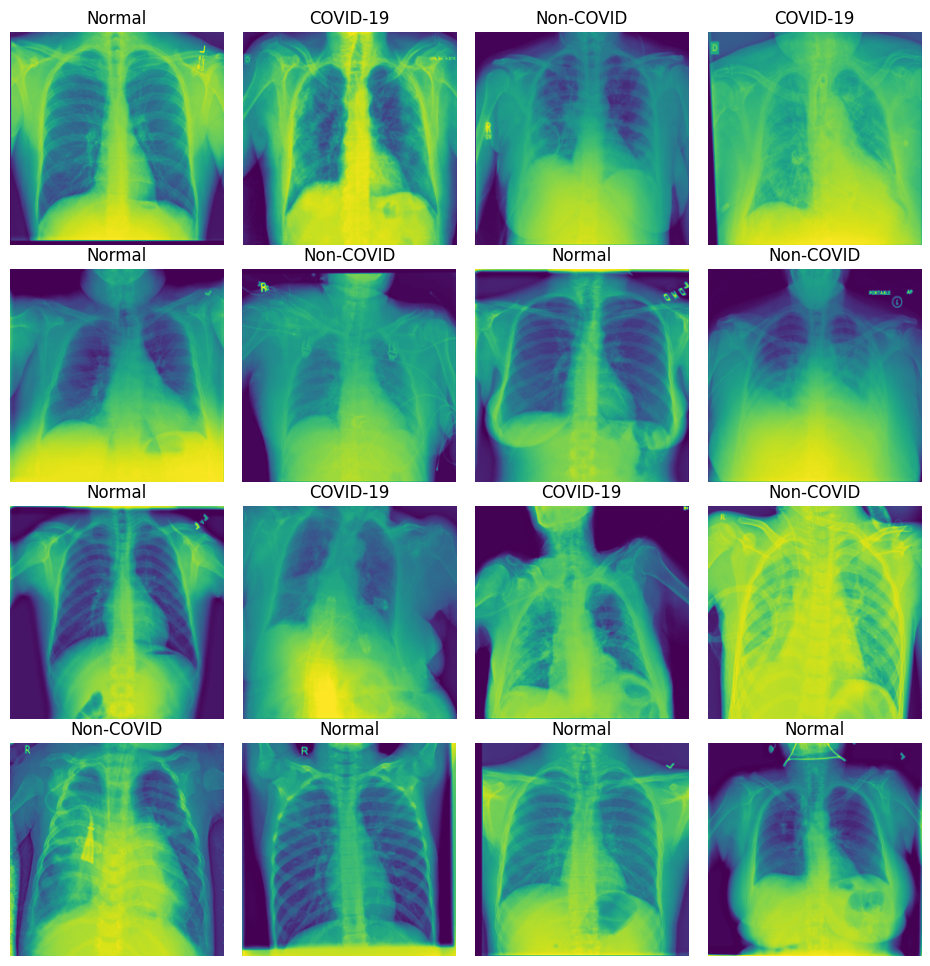

In [ ]:
import random
# Combine the two lists into a list of tuples
combined_tensors = list(zip(qx, qy))
# Shuffle the combined list
random.shuffle(combined_tensors)
# Unpack the shuffled list back into the original two lists
qx, qy = zip(*combined_tensors)
real_class = mostraLote(qx,qy)

In [ ]:
#Put your guesses in guess_class about the above images and get your acurracy
#It is necessary that mostraLote has "y" as input
guess_class = [0,0,0,0,
               0,0,0,0,
               0,0,0,0,
               0,0,0,0]
guess_accuracy(real_class, guess_class)

Manual Accuracy: 25.0%


###**Modelo withtout transfer learning**

In [ ]:
import numpy as np
#Adjusting the dims before fitting
qx = np.expand_dims(qx, axis=0) #qx.shape (len(qx), 256, 256, 1)
ax = np.expand_dims(ax, axis=0) #qx.shape (len(ax), 256, 256, 1)
#ax = ax.astype('float32') / 224.0
#qx = qx.astype('float32') / 224.0
print(qx[0].shape)
print(ax[0].shape)


(12205, 224, 224, 1)
(21715, 224, 224, 1)


In [ ]:
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from time import time
ay = keras.utils.to_categorical(ay, num_classes=3)
qy = keras.utils.to_categorical(qy, num_classes=3)

In [ ]:
print(qx.shape)
print(ay.shape)

(1, 12205, 224, 224, 1)
(21715, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load and preprocess your dataset
# Split it into training, validation, and test sets

# Define your model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn1.png', show_shapes=True);

# Train the model
history = model.fit(
    ax[0], ay,
    epochs=16,
    batch_size=16,
    validation_data=(qx[0], qy),
    verbose=1
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(qx[0], qy)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}')

Epoch 1/16
1358/1358 [==============================] - 34s 24ms/step - loss: 4.0964 - accuracy: 0.5722 - val_loss: 0.8107 - val_accuracy: 0.6442
Epoch 2/16
1358/1358 [==============================] - 31s 23ms/step - loss: 0.7459 - accuracy: 0.6751 - val_loss: 0.6965 - val_accuracy: 0.7091
Epoch 3/16
1358/1358 [==============================] - 30s 22ms/step - loss: 0.6620 - accuracy: 0.7156 - val_loss: 0.6321 - val_accuracy: 0.7444
Epoch 4/16
1358/1358 [==============================] - 30s 22ms/step - loss: 0.5874 - accuracy: 0.7476 - val_loss: 0.5983 - val_accuracy: 0.7558
Epoch 5/16
1358/1358 [==============================] - 29s 22ms/step - loss: 0.5134 - accuracy: 0.7838 - val_loss: 0.5792 - val_accuracy: 0.7694
Epoch 6/16
1358/1358 [==============================] - 30s 22ms/step - loss: 0.5601 - accuracy: 0.7714 - val_loss: 0.6471 - val_accuracy: 0.7571
Epoch 7/16
1358/1358 [==============================] - 30s 22ms/step - loss: 0.4656 - accuracy: 0.8036 - val_loss: 0.6324 -

In [ ]:
model.save('model_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Load and preprocess your dataset
# Split it into training, validation, and test sets

# Define your model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    ax[0], ay,
    epochs=16,
    batch_size=16,
    validation_data=(qx[0], qy),
    verbose=1
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(qx[0], qy)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}')
model.save('model_cnn2.h5')

Epoch 1/16
1358/1358 [==============================] - 62s 36ms/step - loss: 0.7607 - accuracy: 0.6859 - val_loss: 0.5898 - val_accuracy: 0.7705
Epoch 2/16
1358/1358 [==============================] - 48s 36ms/step - loss: 0.6122 - accuracy: 0.7521 - val_loss: 0.4828 - val_accuracy: 0.8120
Epoch 3/16
1358/1358 [==============================] - 49s 36ms/step - loss: 0.5262 - accuracy: 0.7903 - val_loss: 0.7742 - val_accuracy: 0.6831
Epoch 4/16
1358/1358 [==============================] - 49s 36ms/step - loss: 0.4930 - accuracy: 0.8032 - val_loss: 0.6219 - val_accuracy: 0.7429
Epoch 5/16
1358/1358 [==============================] - 44s 32ms/step - loss: 0.4250 - accuracy: 0.8302 - val_loss: 0.9214 - val_accuracy: 0.6193
Epoch 6/16
1358/1358 [==============================] - 49s 36ms/step - loss: 0.3736 - accuracy: 0.8536 - val_loss: 0.3852 - val_accuracy: 0.8519
Epoch 7/16
1358/1358 [==============================] - 49s 36ms/step - loss: 0.3343 - accuracy: 0.8708 - val_loss: 0.3413 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###**Model with transfer learning**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom

base_model = EfficientNetB0(include_top=False, weights="imagenet", input_shape=(224, 224, 3),  classes=ay.shape[1])
data_augmentation = Sequential(
    [RandomRotation(0.1),
     RandomZoom(0.1)])

x = data_augmentation(base_model.output)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
= BatchNormalization()(x)
x = Dropout(0.3)(x)x
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


epochs = 8
batch_size = 16

#Nao permite treinar base_model. So as camadas densas sao treinadas:
for layer in base_model.layers: layer.trainable = False
#Treina com learning rate grande
otimizador=keras.optimizers.Adam(learning_rate=1e-4)
model.compile(otimizador, loss='categorical_crossentropy', metrics =['accuracy'])
model.fit(ax[0], ay, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(qx[0],qy))

score = model.evaluate(ax[0], ay, verbose=1); print('Training loss:', score)
score = model.evaluate(qx[0], qy, verbose=1); print('Test loss:', score)

#Libera todos layers do model (incluindo modelo-base) para treinar:
for layer in model.layers: layer.trainable = True
#Treina com learning rate pequena todas as camadas
model.learning_rate=1e-7
model.fit(ax[0], ay, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(qx[0],qy))

score = model.evaluate(ax[0], ay, verbose=1); print('Training loss:', score)
score = model.evaluate(qx[0], qy, verbose=1); print('Test loss:', score)

model.save("effnet_transfer.h5")

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 224, 224, 3)          0         ['input_3[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_3[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_2[0][0]'

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Trying to improve the results with TTA
#libs to load and evaluate the saved model
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom
from keras.models import load_model
from tqdm import tqdm
# Load the model
model = load_model('effnet_transfer.h5')
#Transformation being done to the images
tta_steps = 2
batch_size = 8
predictions = []
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=False,
        rotation_range=10.,
        fill_mode='reflect',
        width_shift_range = 0.15,
        height_shift_range = 0.15)

#Preds to the deformated images
for i in tqdm(range(tta_steps)):
    preds = model.predict_generator(train_datagen.flow(qx[0], batch_size=batch_size, shuffle=False), steps = len(qx[0])/batch_size)
    predictions.append(preds)

pred = np.mean(predictions, axis=0)

np.mean(np.equal(np.argmax(qy, axis=-1), np.argmax(pred, axis=-1)))

  0%|          | 0/2 [00:00<?, ?it/s]<ipython-input-10-d06b6e5ff6b2>:27: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(train_datagen.flow(qx[0], batch_size=batch_size, shuffle=False), steps = len(qx[0])/batch_size)
100%|██████████| 2/2 [02:23<00:00, 71.76s/it]


0.8309709135600164

### **Conclusions**


It is perceptive with the results of each model, that the manual evaluation is pretty hard and inneficient most of the time when compared to model that were fine-tunned with X-Rays images.Also, the model that was initialized with pre-trained weights(w/transfer learning) stands out when concerning all methods of testing.